# Homework #08

Name : Wang Penghao

Student ID : 2021533138

# Problem 1

(a) As for the Logistic distribution with CDF $F(x) = \dfrac{1}{1 + e^{-x}}, \forall x \in R$, we first do the inverse transformation, we get that $\dfrac{F(x)}{1 - F(x)} = e^x$, then we get that $$ln(\dfrac{F(x)}{1 - F(x)}) = x \rightarrow F^{-1}(x) = ln(\dfrac{x}{1 - x}). $$
Then we can do sampling, code are as follows. 

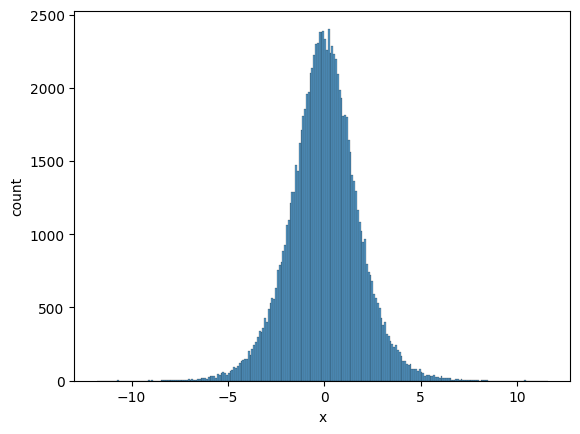

In [28]:
import numpy as np
import seaborn as sns

# define the sample number
N = 100000
# generate sameple points
x = np.random.uniform(0, 1, N)
inverse = np.log(x/(1 - x))
# plot the histogram
plot = sns.histplot(inverse, stat = 'count')
plot.set_xlabel('x')
plot.set_ylabel('count');

(b) As for the Rayleigh distribution with CDF $F(x) = 1 - e^{\frac{-x^2}{2}}, \forall x > 0$, we first do the inverse transformation, we get that $1 - F(x) = e^{-\frac{x^2}{2}}$, then we get that $$ln(1 - F(x)) = -\frac{x^2}{2} \rightarrow F^{-1}(x) = \sqrt{-2ln(1 - x)}. $$
Then we can do sampling, code are as follows. 

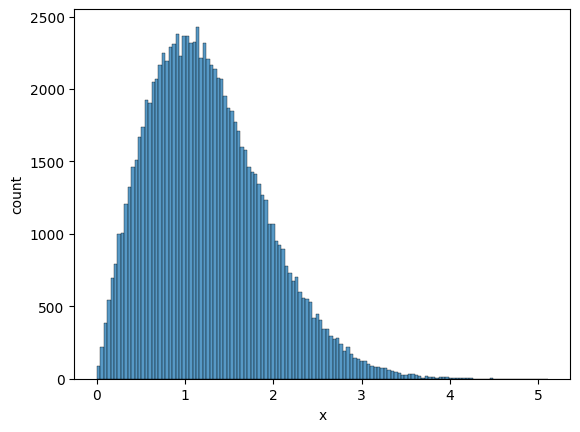

In [27]:
import numpy as np
import seaborn as sns

# define the sample number
N = 100000
# generate sameple points
x = np.random.uniform(0, 1, N)
inverse = np.sqrt(-2*np.log(1 - x))
# plot the histogram
plot = sns.histplot(inverse, stat = 'count')
plot.set_xlabel('x')
plot.set_ylabel('count');

(c) As for the Exponential distribution with CDF $F(x) = 1 - e^{-x}, x > 0$, we first do the inverse transformation, we get that $1 - F(x) = e^{-x}$, then we get that $$ln(1 - F(x)) = -x \rightarrow F^{-1}(x) = -ln(1 - x). $$
Then we can do sampling, code are as follows. 

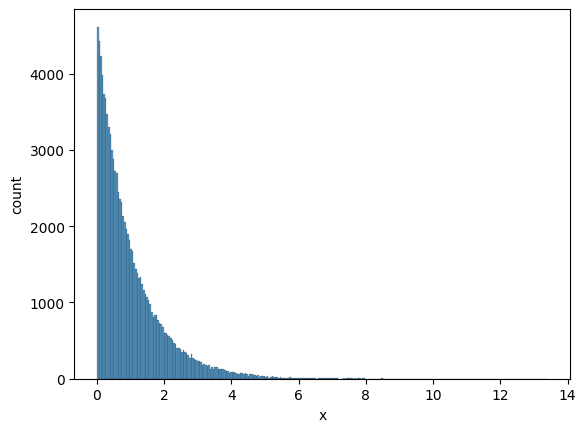

In [26]:
import numpy as np
import seaborn as sns

# define the sample number
N = 100000
# generate sameple points
x = np.random.uniform(0, 1, N)
inverse = -np.log(1 - x)
# plot the histogram
plot = sns.histplot(inverse, stat = 'count')
plot.set_xlabel('x')
plot.set_ylabel('count');

# Problem 2

(a) Bernoulli distribution Bern(0.5), we have that when generate a random number between 0 and 1, if it is less than 0.5, we get 0, otherwise we get 1. Code are as follows.


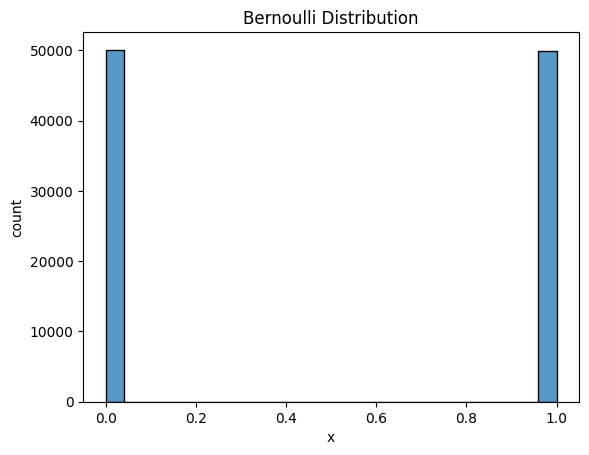

In [4]:
import numpy as np
import seaborn as sns

# define the sample number
N = 100000
# generate sameple points
x = np.random.uniform(0, 1, N)
# define bernoulli success probability
p = 0.5
# determine if the trail get 0 or 1
for i in range(N):
    if x[i] < p:
        x[i] = 0
    else:
        x[i] = 1
# plot the histogram
plot = sns.histplot(x, stat = 'count')
plot.set_xlabel('x')
plot.set_ylabel('count')
plot.set_title('Bernoulli Distribution');

(b) Binomial distribution Bin(20, 0.5), we have that as binomial trail are the combination of bernoulli distribution, then when generate a random number between 0 and 1, if it is less than 0.5, we get 0, otherwise we get 1. Then we compute the sum of the 20 times bernoulli trails and get the result. Code are as follows.

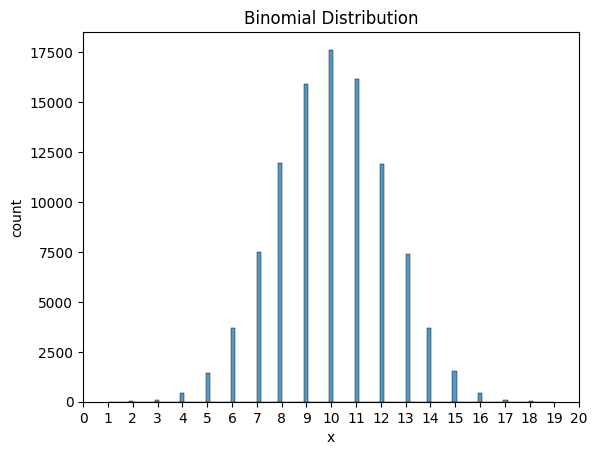

In [6]:
import numpy as np
import seaborn as sns

# define the sample number
N = 100000
# generate result points
x = np.zeros(N)
# define bernoulli success probability
p = 0.5
# define binomial trail number
n = 20
# determine if the trail get 0 or 1
for i in range(N):
    # generate n bernoulli trails
    y = np.random.uniform(0, 1, n)
    for j in y:
        if j < p:
            x[i] += 1
        
# plot the histogram
plot = sns.histplot(x, stat = 'count')
plot.set_xlabel('x')
plot.set_ylabel('count')
plot.set_title('Binomial Distribution')
plot.set_xticks([i for i in range(0, 21)]);

(c) Geometric distribution Geom(0.5), we get that as geometric distribution is the combination of bernoulli with probability of 0.5, then we calculate the failure times before the first success. Code are as follows.

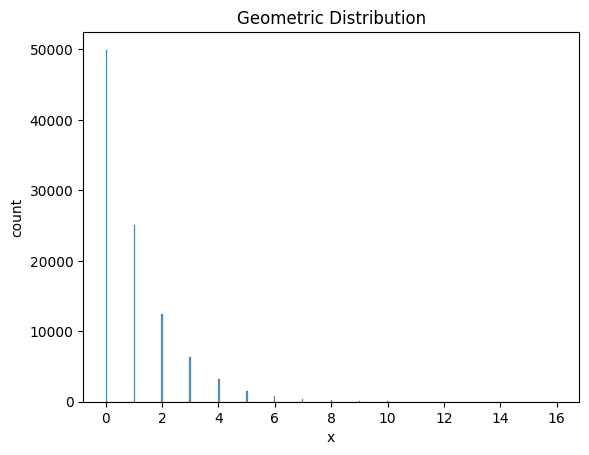

In [8]:
import numpy as np
import seaborn as sns

# define the sample number
N = 100000
# generate result points
x = np.zeros(N)
# define bernoulli success probability
p = 0.5
# determine if the trail get 0 or 1
for i in range(N):
    # sum bernoulli trails until the first success
    while True:
        y = np.random.uniform(0, 1)
        if y < p:
            break
        else:
            x[i] += 1
        
# plot the histogram
plot = sns.histplot(x, stat = 'count')
plot.set_xlabel('x')
plot.set_ylabel('count')
plot.set_title('Geometric Distribution');

(d) Negative Binomial distribution NBin(0.5), we get that as negative binomial distribution is the combination of bernoulli with probability of 0.5, then we calculate the failure times before the first success. Code are as follows.

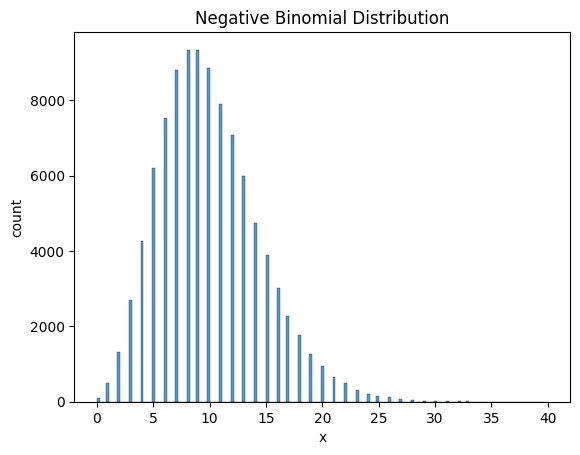

In [9]:
import numpy as np
import seaborn as sns

# define the sample number
N = 100000
# generate result points
x = np.zeros(N)
# define bernoulli success probability
p = 0.5
# define binomial trail number
n = 10
# determine if the trail get 0 or 1
for i in range(N):
    # sum bernoulli trails until the nth success
    sucess = 0
    while sucess < n:
        y = np.random.uniform(0, 1)
        if y < p:
            sucess += 1
        else:
            x[i] += 1
        
# plot the histogram
plot = sns.histplot(x, stat = 'count')
plot.set_xlabel('x')
plot.set_ylabel('count')
plot.set_title('Negative Binomial Distribution');

# Problem 3

(a) As we have the definition of sample mean, we get that $$\bar{X} = \dfrac{1}{n}\sum_{i=1}^{n}X_i. $$ Then we can calculate the mean of the 5000 times of sample mean of 100000 $U_i$ of the N distribution. Code are as follows.

In [66]:
import numpy as np

# define the sample number
N = 100000
# define the number of generate times
M = 5000
# generate result points
x = np.zeros(M)
# estimate E(N) by generateing 5000 values of N
for i in range(M):
    # generate sameple points
    y = np.random.uniform(0, 1, N)
    # define the product
    product = 1
    # calculate the product
    for j in range(1, N + 1):
        product *= y[j - 1]
        if product < np.exp(-1):
            x[i] = j - 1
            break

In [65]:
# print result
print('E(N) estimated by generateing 5000 values of N is', np.mean(x))

E(N) estimated by generateing 5000 values of N is 1.001


(b) As for the Var(N), we can use the 5000 times of generated sample mean to calculate the variance of the sample mean. Code are as follows.

In [57]:
# print result
print('Var(N) estimated by generateing 5000 values of N is', np.var(x))

E(N) estimated by generateing 5000 values of N is 0.97925116


(c) As for the P(N = i), where i = 0, 1, 2, 3, we can use the 5000 times of generated sample mean to calculate the variance of the sample mean. Code are as follows.

In [67]:
from collections import Counter
# print result
for i in range(0, 4):
    print('P(N = %d) estimated by generateing 5000 values of N is' % i, Counter(x)[i]/M)

P(N = 0) estimated by generateing 5000 values of N is 0.3572
P(N = 1) estimated by generateing 5000 values of N is 0.3788
P(N = 2) estimated by generateing 5000 values of N is 0.187
P(N = 3) estimated by generateing 5000 values of N is 0.0556


(d) As for the exact distribution of N, the solution is $N \sim Pois(1)$, the calculation is as follows.

As we have that $$N = max\{n:\prod_{i = 0}^n U_i \geq e^{-1}\}$$, then we have that $$ln(\prod_{i = 0}^n U_i) \geq -1 \rightarrow \sum_{i = 1}^n lnU_i \geq -1 \rightarrow \sum_{i = 1}^n -lnU_i \leq 1, $$ then use the Universality of Uniform, we let $U_i \sim Unif(0, 1)$ and that $X_i = -ln U_i$, so we have that $$1 - U_i = 1 - e^{-X_i} \rightarrow 1 - U_i \sim Unif(0, 1), $$ so that the CDF is that $F = 1 - e^{-x}$, the PDF is $f = F' = e^{-x}$, the we calculate $P(N = n) = \dfrac{e^{-1}}{n!}$, so we have that the exact distribution of N is $N \sim Pois(1)$.

# Problem 4

(a) For each simulation, we randomly assign door with car, door with goats, and randomly choose one door. Code are as follows. 

In [26]:
import random

# define the number of times of the game
N = 1000000
# insist win times
insist_win = 0
# change win times
change_win = 0
# iterate the game
for i in range(N):
    # define doors
    doors = [0, 1, 2]
    # define the door with car
    car = random.choice(doors)
    # define the door that the player choose
    player = random.choice(doors)
    '''define the door that the host open'''

    # if the player choose the door with car
    if player == car:
        insist_win += 1
    # if the player choose the door with goat
    else:
        if player == 0:
            change_win += 1
        if player == 1:
            change_win += 1
        if player == 2:
            change_win += 1

# print result
print('The probability of win if the player insist is', insist_win/N)
print('The probability of win if the player change is', change_win/N)
if (insist_win/N) > (change_win/N):
    print('The player should insist.')
else:
    print('The player should change.')

The probability of win if the player insist is 0.332703
The probability of win if the player change is 0.667297
The player should change.


(b) Accroding to the problem, we simulate for n = 4 and 100, then we get the result, code are as follows.

In [38]:
import random

# define the number of times of the game
N = 100000
# define the number of doors
n = [4, 100]
# strategy1 win times
strategy1_win = [0, 0]
# strategy2 win times
strategy2_win = [0, 0]
# strategy3 win times
strategy3_win = [0, 0]

# strategy1
# Select a door at random and stick with it throughout.
# iterate the game
for i in n:
    for j in range(N):
        # define doors
        doors = [k for k in range(i)]
        # define the door with car
        car = random.choice(doors)
        # define the door that the player choose
        player = random.choice(doors)
        # if the player choose the door with car
        if player == car:
            strategy1_win[n.index(i)] += 1

# strategy2
# Select a door at random, then switch doors at every opportunity, choosing your door randomly at each step
# iterate the game
for i in n:
    for j in range(N):
        # define doors
        doors = [k for k in range(i)]
        # define the door with car
        car = random.choice(doors)
        # define open doors
        open_doors = {}
        # define the door that the player choose
        player = random.choice(doors)
        for k in range(i - 2):
            host = car
            while host == car or host == player or host in open_doors:
                host = random.choice(doors)
            open_doors[host] = 1
            new_player = player
            while new_player == player or new_player == host or new_player in open_doors:
                new_player = random.choice(doors)
            player = new_player
        if player == car:
            strategy2_win[n.index(i)] += 1

# strategy3
# Select a door at random, stick with your first choice until only two doors remain, and then switch
# iterate the game
for i in n:
    for j in range(N):
        # define doors
        doors = [k for k in range(i)]
        # define the door with car
        car = random.choice(doors)
        # define the door that the player choose
        player = random.choice(doors)
        # if the player choose the door with car
        if player != car:
            strategy3_win[n.index(i)] += 1
            

# print
for i in n:
    print('The probability of win if the player use strategy1 with %d doors is' % i, strategy1_win[n.index(i)]/N)
    print('The probability of win if the player use strategy2 with %d doors is' % i, strategy2_win[n.index(i)]/N)
    print('The probability of win if the player use strategy3 with %d doors is' % i, strategy3_win[n.index(i)]/N)

# compare the three strategies
# sort the result
max_win_4_doors = max(strategy1_win[0], strategy2_win[0], strategy3_win[0])
max_win_100_doors = max(strategy1_win[1], strategy2_win[1], strategy3_win[1])
# print
print('The best strategy with 4 doors is', 'strategy1' if max_win_4_doors == strategy1_win[0] else 'strategy2' if max_win_4_doors == strategy2_win[0] else 'strategy3')
print('The best strategy with 100 doors is', 'strategy1' if max_win_100_doors == strategy1_win[1] else 'strategy2' if max_win_100_doors == strategy2_win[1] else 'strategy3')


The probability of win if the player use strategy1 with 4 doors is 0.24939
The probability of win if the player use strategy2 with 4 doors is 0.62539
The probability of win if the player use strategy3 with 4 doors is 0.75287
The probability of win if the player use strategy1 with 100 doors is 0.00989
The probability of win if the player use strategy2 with 100 doors is 0.63206
The probability of win if the player use strategy3 with 100 doors is 0.98987
The best strategy with 4 doors is strategy3
The best strategy with 100 doors is strategy3


# Problem 5

In this problem, we use monte carlo simulation for 20 by 20 grid, 50 by 50 grid, 100 by 100 grid. Code are as follows.

In [14]:
import numpy as np
import random

# DSU
class DSU:
    def __init__(self, h, w):
        self.parent = {}
        for i in range(h):
            for j in range(w):
                self.parent[(i, j)] = (i, j)
                if i == 0:
                    self.parent[(i, j)] = (0, 0)
                if i == h - 1:
                    self.parent[(i, j)] = (h - 1, w - 1)
    
    def find(self, node):
        if self.parent[node] == node:
            return node
        self.parent[node] = self.find(self.parent[node])
        return self.parent[node]
    
    def union(self, node1, node2):
        self.parent[node1] = self.find(node1)
        self.parent[node2] = self.find(node2)
        self.parent[self.parent[node1]] = self.parent[node2]

def perlocation(i):
    # define the grid
    grid = np.array(np.zeros((i, i)))
    # define the DSU
    dsu = DSU(i, i)
    # define the number of sites opened
    sites_opened = 0
    # loop until the system percolates
    while True:
        # sites opened
        sites_opened += 1
        # choose one site randomly
        where = np.where(grid == 0)
        rand_index = random.randint(0, np.shape(where)[1] - 1)
        free_site = [where[0][rand_index], where[1][rand_index]]
        # let the site open
        grid[free_site[0], free_site[1]] = 1
        # define four directions
        directions = [[-1, 0], [1, 0], [0, -1], [0, 1]]
        # loop for four directions
        for k in directions:
            if 0 <= free_site[0] + k[0] and free_site[0] + k[0] < i and 0 <= free_site[1] + k[1] and free_site[1] + k[1] < i and grid[free_site[0] + k[0], free_site[1] + k[1]] == 1:
                dsu.union((free_site[0], free_site[1]), (free_site[0] + k[0], free_site[1] + k[1]))
        # if the system percolates
        if dsu.find((0, 0)) == dsu.find((i - 1, i - 1)):
            return sites_opened

# define grid size
grid_size = [20, 50, 100]
# define the number of monte carlo simulation
N = 1000
# result
result = [0, 0, 0]
# loop
for i in grid_size:
    # sum for each simulation
    sum = 0
    # loop for monte carlo
    for j in range(N):
        # single simulation
        sum += perlocation(i)
    
    result[grid_size.index(i)] = sum / N

# print
for i in grid_size:
    print('The average number of sites opened when the grid size is %d is' % i, result[grid_size.index(i)] / (i * i))

The average number of sites opened when the grid size is 20 is 0.58973
The average number of sites opened when the grid size is 50 is 0.5908696
The average number of sites opened when the grid size is 100 is 0.5923298
